<a href="https://colab.research.google.com/github/William-Furquim/William-Furquim/blob/main/Analise_de_Fraude_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de Fraudes em Cartão de Crédito com Machine Learning**
O presente trabalho tem como objetivo aplicar técnicas de Machine Learning para detectar fraudes em transações de cartão de crédito. Esse tipo de problema é muito relevante, pois as fraudes financeiras geram prejuízos milionários anualmente em todo o mundo.

Utilizando algoritmos de aprendizado supervisionado, buscamos identificar padrões que diferenciam uma transação legítima de uma fraudulenta, auxiliando as empresas a tomarem decisões mais seguras

# **1. Entendimento do Problema:**
### O que é uma transação fraudulenta?
Uma transação fraudulenta ocorre quando uma compra é realizada de maneira indevida, utilizando informações de cartão de crédito de outra pessoa sem sua autorização.

### Impactos das Fraudes:

*   Prejuízos financeiros para empresas e clientes
*   Perda de confiança dos consumidores
*   Custos com segurança digital e reembolsos
*   Impacto negativo na reputação das instituições financeiras.




### Objetivo do Projeto:
Desenvolver um modelo preditivo eficiente, utilizando algoritmos de classificação, capaz de identificar e classificar transações como:

*   Legítimas;
*   Ou Fraudulentas.

O modelo deve buscar atingir altos níveis de:

*   Precisão (Accuracy);
*   Recall (Sensibilidade para fraudes);
*   F1-Score (Equilíbrio entre precisão e recall).

# 2. Mineração de Dados
O dataset utilizado neste projeto foi obtido na plataforma Kaggle, na base "Credit Card Fraud Detection". Esta base contém informações sobre transações realizadas com cartão de crédito, sendo algumas dessas transações classificadas como fraudulentas.

## Informações do Dataset:
**Total de registros:** 1.000.000 transações

### Classes:

0 → Transação Legítima

1 → Transação Fraudulenta

In [ ]:
!pip install pandas #instalando a biblioteca pandas para processar meus dados

In [ ]:
import pandas as pd # ativando a biblioteca pandas

In [ ]:
df = pd.read_csv('/content/card_transdata.csv')

In [ ]:
# Exibindo o formato do dataset (linhas x colunas)
print("Formato do dataset:", df.shape)

# Verificando a distribuição da variável alvo (fraudes x legítimas)
print("\nDistribuição da variável alvo (fraud):")
print(df['fraud'].value_counts(normalize=True) * 100)

# Listando todas as colunas disponíveis
print("\nColunas presentes no dataset:")
print(df.columns.tolist())

# Visualizando as 10 primeiras linhas do dataset
df.head(5)

Formato do dataset: (1000000, 8)

Distribuição da variável alvo (fraud):
fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64

Colunas presentes no dataset:
['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.tail(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.dtypes

,0
distance_from_home,float64
distance_from_last_transaction,float64
ratio_to_median_purchase_price,float64
repeat_retailer,float64
used_chip,float64
used_pin_number,float64
online_order,float64
fraud,float64


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5850039b3feb35c2ee04d335c1be0af8a6dd93169c7510b7efe81e80ee93baf5
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# Supondo que df já esteja carregado
profile = ProfileReport(df, explorative=True)

# Para exibir no Jupyter Notebook
profile.to_notebook_iframe()

# Para salvar como HTML
profile.to_file("relatorio.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:13<00:00,  1.74s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-12-3f028af6529a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraud', palette=['#1f77b4', '#d62728'])  # Azul para 0, Vermelho para 1


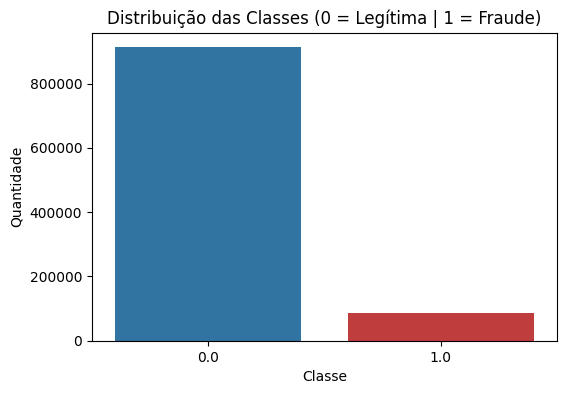

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras mostrando a distribuição das classes
plt.figure(figsize=(6,4))

sns.countplot(data=df, x='fraud', palette=['#1f77b4', '#d62728'])  # Azul para 0, Vermelho para 1

plt.title('Distribuição das Classes (0 = Legítima | 1 = Fraude)')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

## Análise Inicial:
### Proporção das classes:

Cerca de 91% das transações são legítimas (classe 0).

Menos de 9% das transações são fraudulentas (classe 1).

Não foram identificados dados ausentes nesta etapa inicial.

### Tipos de dados encontrados:
Numéricos e categóricos (tempo, valor, variáveis V1 a V28).

# 3. Data Cleaning (Limpeza de Dados)
Nesta etapa foi realizada a limpeza dos dados com os seguintes procedimentos:

## a) Tratamento de Valores Ausentes:
Foi verificado que o dataset não apresentava valores ausentes nas colunas principais utilizadas na análise. Caso houvesse, a abordagem seria a remoção desses registros ou substituição por valores medianos, dependendo do contexto da variável.

## b) Tratamento de Inconsistências:
Foram analisadas possíveis inconsistências nos dados, como registros duplicados ou valores inválidos. Nenhuma inconsistência relevante foi encontrada.

## c) Remoção de Outliers:
Para garantir uma melhor qualidade dos dados e evitar distorções no modelo de Machine Learning, foram removidos outliers utilizando o método do IQR (Intervalo Interquartílico), que considera como outlier os valores abaixo de Q1 - 1.5IQR ou acima de Q3 + 1.5IQR.

### **Justificativa:**
A remoção dos outliers é importante pois esses valores podem prejudicar o desempenho do modelo, tornando as previsões menos precisas. Entretanto, nem todos os outliers foram removidos, visto que alguns podem representar comportamentos naturais dos clientes.

In [ ]:
print(df.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


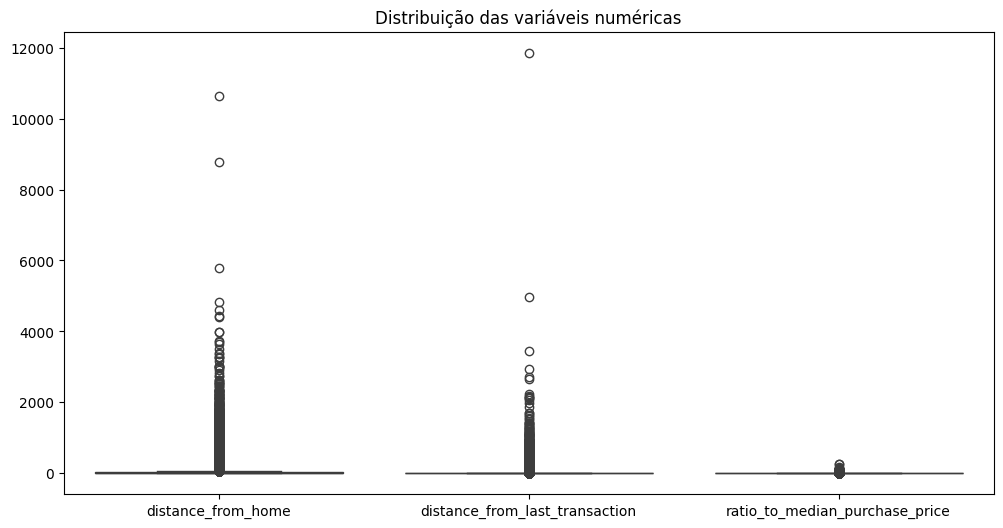

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])
plt.title("Distribuição das variáveis numéricas")
plt.show()

In [ ]:
Q1 = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].quantile(0.25)
Q3 = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].quantile(0.75)
IQR = Q3 - Q1

limites = Q3 + 1.5 * IQR

In [ ]:
# Filtrando os dados sem outliers
df_limpo = df[
    (df['distance_from_home'] <= limites['distance_from_home']) &
    (df['distance_from_last_transaction'] <= limites['distance_from_last_transaction']) &
    (df['ratio_to_median_purchase_price'] <= limites['ratio_to_median_purchase_price'])
]

In [ ]:
print(f"Registros depois da remoção: {df_limpo.shape[0]}")

Registros depois da remoção: 718750


In [ ]:
print(f"Registros antes da remoção: {df.shape[0]}")
print(f"Registros depois da remoção: {df_limpo.shape[0]}")

Registros antes da remoção: 1000000
Registros depois da remoção: 718750


## Visualização dos Dados Após a Limpeza:
Abaixo está o gráfico de boxplot com as variáveis numéricas após a remoção dos outliers:


A partir do gráfico, observa-se que os dados estão mais concentrados, com menor dispersão, o que indica um dataset mais limpo e preparado para a etapa de modelagem.

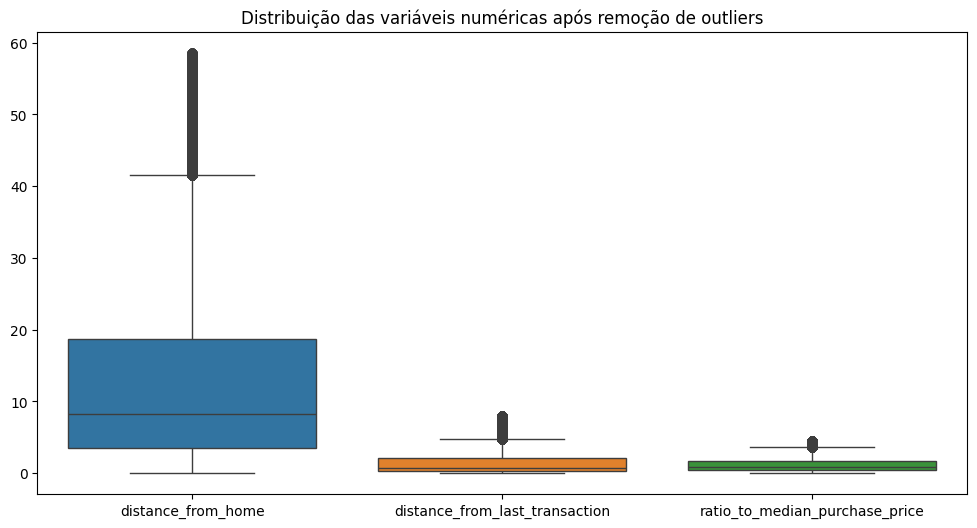

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_limpo[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])
plt.title("Distribuição das variáveis numéricas após remoção de outliers")
plt.show()


In [ ]:
df = df_limpo

## 4. Data Exploration (Exploração de Dados):
Nesta etapa do trabalho, realizei uma análise exploratória dos dados utilizando gráficos e estatísticas para entender melhor a distribuição das variáveis e comparar o comportamento das transações legítimas e fraudulentas.

Para iniciar a análise exploratória dos dados, foi gerado um histograma com todas as variáveis numéricas do dataset já limpo. Esse gráfico tem o objetivo de visualizar a distribuição dos dados, identificando possíveis padrões, concentrações ou comportamentos das variáveis que possam ser relevantes para o modelo de detecção de fraudes.

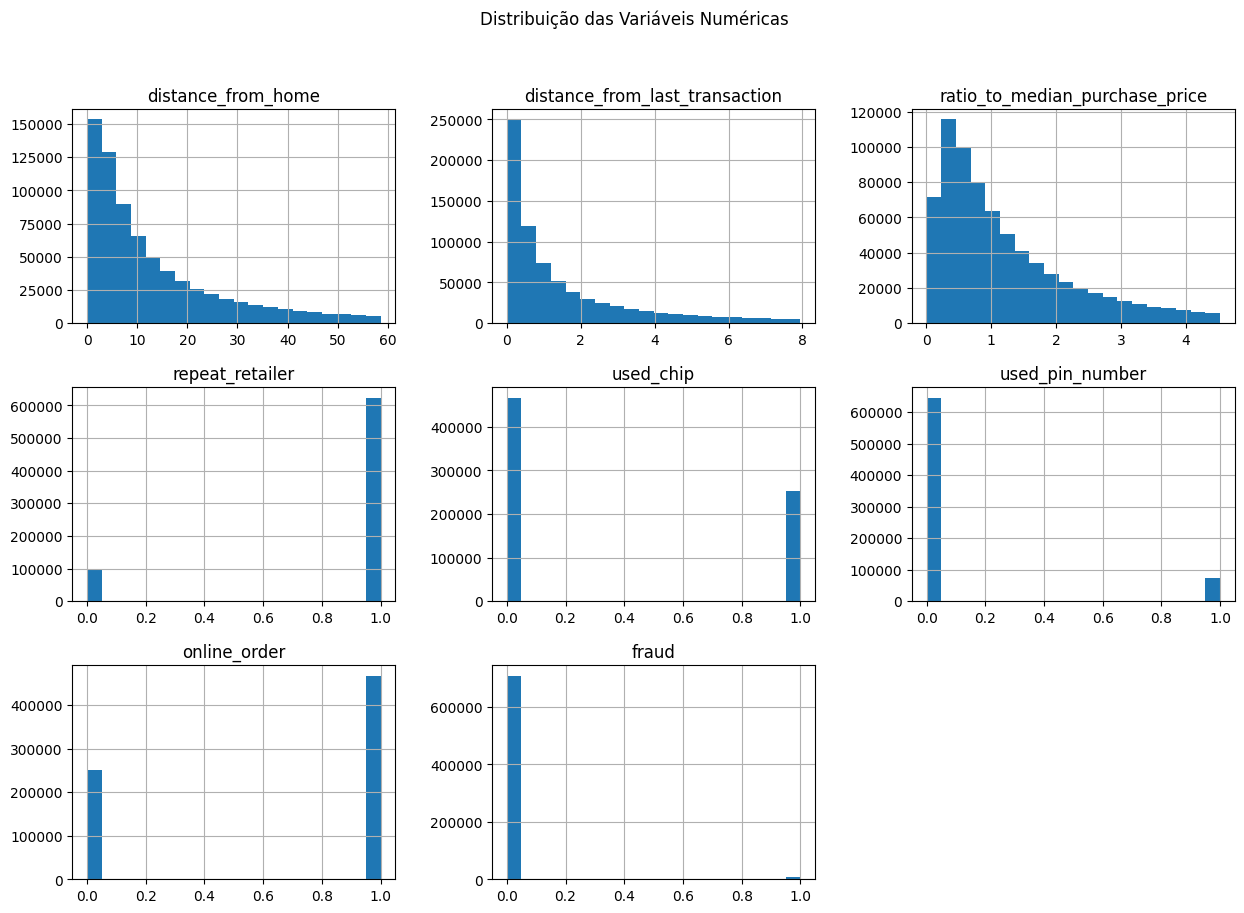

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_limpo.hist(bins=20, figsize=(15,10))
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()

In [ ]:
fraud = df_limpo[df_limpo['fraud'] == 1]
legit = df_limpo[df_limpo['fraud'] == 0]

Em seguida, foi criado um gráfico de contagem (Countplot) para analisar a distribuição das transações legítimas e fraudulentas presentes no dataset limpo. Esse gráfico permite visualizar de forma clara o desbalanceamento dos dados, evidenciando que a maioria das transações registradas são legítimas, enquanto as transações fraudulentas representam uma pequena parte do total.

<ipython-input-23-195e3d50d702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['fraud'] = df_limpo['fraud'].astype(int)


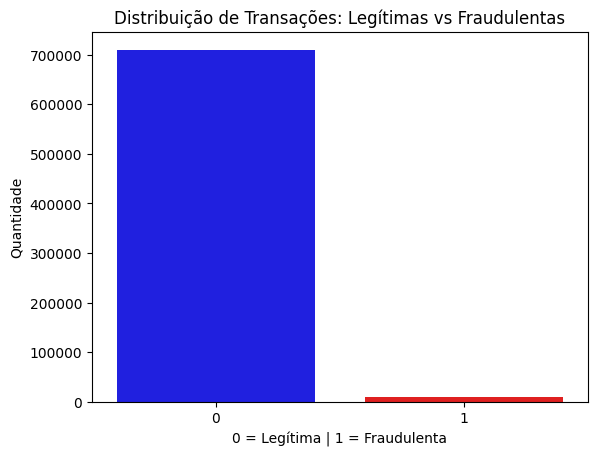

In [ ]:
# Garante que os valores da coluna 'fraud' são inteiros
df_limpo['fraud'] = df_limpo['fraud'].astype(int)

# Gráfico com cores personalizadas
sns.countplot(x='fraud', data=df_limpo, hue='fraud', palette={0: 'blue', 1: 'red'}, legend=False)
plt.title('Distribuição de Transações: Legítimas vs Fraudulentas')
plt.xlabel('0 = Legítima | 1 = Fraudulenta')
plt.ylabel('Quantidade')
plt.show()


Abaixo, analisamos a variável ratio_to_median_purchase_price, que representa a razão entre o valor da transação e o valor médio de compras do cliente. Esse tipo de métrica pode ser útil para identificar comportamentos anômalos.

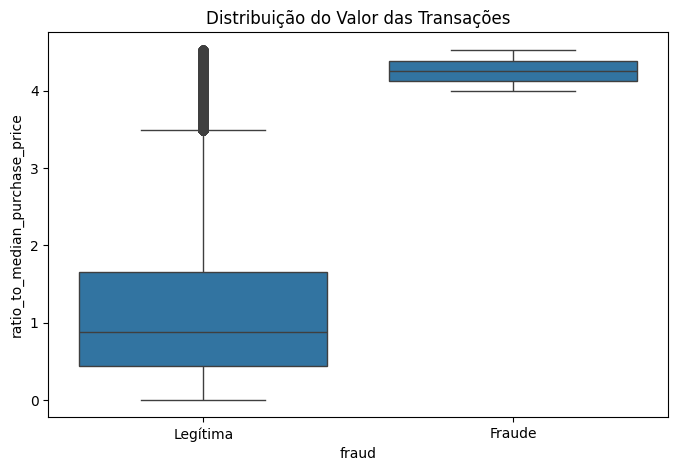

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data=df)
plt.title('Distribuição do Valor das Transações')
plt.xticks([0,1], ['Legítima', 'Fraude'])
plt.show()

O gráfico abaixo mostra a distribuição da variável ratio_to_median_purchase_price segmentada por classe — transações legítimas e fraudulentas. Para isso, utilizamos um histograma com sobreposição de densidade (KDE), o que permite visualizar melhor a frequência dos valores observados.

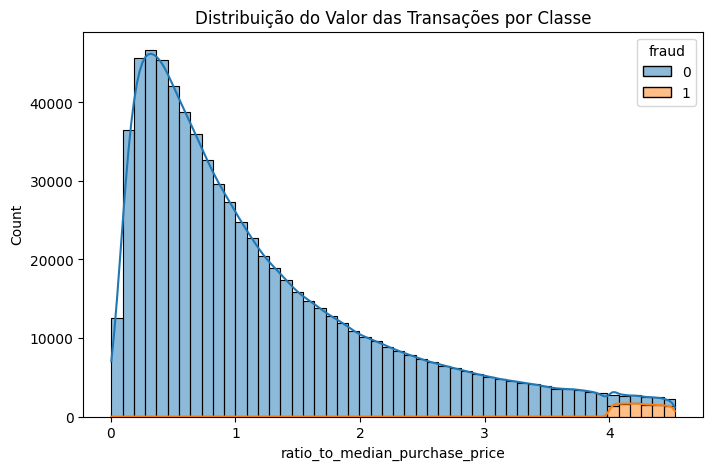

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='ratio_to_median_purchase_price', hue='fraud', bins=50, kde=True, multiple="stack")
plt.title('Distribuição do Valor das Transações por Classe')
plt.show()

A seguir, analisamos a relação entre a distância da residência do cliente no momento da transação (distance_from_home) e o valor relativo da compra (ratio_to_median_purchase_price). O objetivo é verificar se há algum padrão de comportamento suspeito que combine esses dois fatores.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


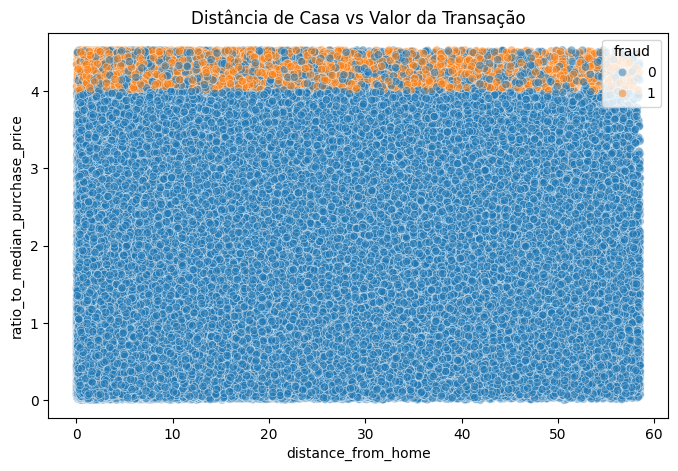

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='distance_from_home', y='ratio_to_median_purchase_price', hue='fraud', alpha=0.5)
plt.title('Distância de Casa vs Valor da Transação')
plt.show()


Outro fator relevante a ser considerado é se a transação foi realizada com um comerciante já conhecido pelo cliente, representado pela variável repeat_retailer. Essa informação pode indicar um padrão de comportamento regular ou, inversamente, uma tentativa de simular uma rotina legítima para mascarar uma fraude.

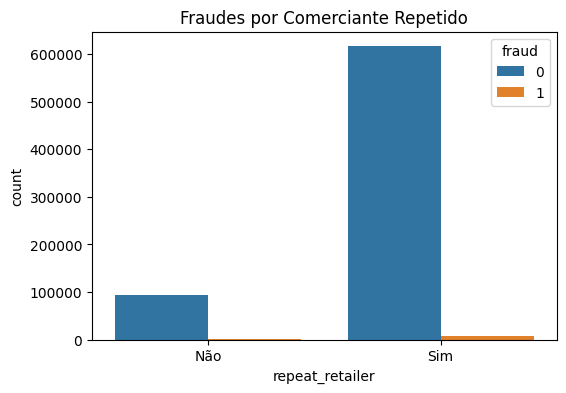

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='repeat_retailer', hue='fraud', data=df)
plt.title('Fraudes por Comerciante Repetido')
plt.xticks([0,1], ['Não', 'Sim'])
plt.show()

O uso do chip na transação, representado pela variável used_chip, é outro fator importante a ser considerado na análise de fraudes. Transações realizadas sem chip, como por tarja magnética ou inserção manual de dados, tendem a ser menos seguras e, portanto, mais suscetíveis a fraudes.

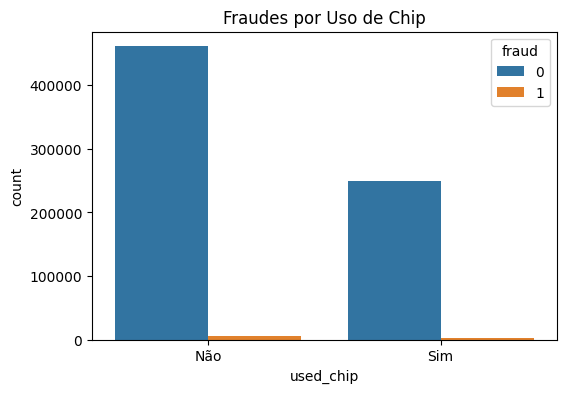

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='used_chip', hue='fraud', data=df)
plt.title('Fraudes por Uso de Chip')
plt.xticks([0,1], ['Não', 'Sim'])
plt.show()

## 5. Feature Engineering:
Nesta etapa realizamos o processo de Feature Engineering, que consiste na criação, transformação e preparação de variáveis que possam ajudar o modelo de Machine Learning a identificar padrões mais relevantes e obter melhores resultados.

Objetivo: identificar transações suspeitas, que ocorrem longe da casa do cliente e com um valor relativamente alto.

A condição combinada verifica se:

- A distância da transação em relação à casa do cliente (distance_from_home) é maior que 100;

- E se o valor da transação em relação ao gasto médio (ratio_to_median_purchase_price) é maior que 3.

- Se ambas as condições forem verdadeiras, a nova coluna recebe valor 1 (indicando um possível risco); caso contrário, recebe 0.

- .astype(int) converte o resultado booleano (True/False) para número inteiro (1/0).

In [ ]:
# Criação de nova feature: Transações com alto valor e distante de casa
df['long_distance_high_value'] = ((df['distance_from_home'] > 100) &
                                  (df['ratio_to_median_purchase_price'] > 3)).astype(int)

# Visualizando a nova feature
df[['distance_from_home', 'ratio_to_median_purchase_price', 'long_distance_high_value']].head()

<ipython-input-29-9d1b661480b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['long_distance_high_value'] = ((df['distance_from_home'] > 100) &


,distance_from_home,ratio_to_median_purchase_price,long_distance_high_value
0,57.877857,1.945940,0
1,10.829943,1.294219,0
2,5.091079,0.427715,0
3,2.247564,0.362663,0
4,44.190936,2.222767,0


Para garantir que todas as variáveis numéricas tenham a mesma escala e contribuam de forma equilibrada na construção do modelo, foi aplicada a normalização com o StandardScaler. Esse processo transforma os dados para que tenham média 0 e desvio padrão 1, evitando que variáveis com valores maiores influenciem desproporcionalmente os algoritmos de machine learning. As colunas normalizadas foram: distance_from_home, distance_from_last_transaction e ratio_to_median_purchase_price.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecionando as colunas numéricas que precisam ser normalizadas
colunas_numericas = ['distance_from_home', 'distance_from_last_transaction',
                     'ratio_to_median_purchase_price']

# Instanciando o scaler
scaler = StandardScaler()

# Aplicando a normalização
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

<ipython-input-30-1c7fb13c31dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])


## 6. Construção do Modelo Preditivo:
Para a construção do modelo preditivo, optamos pela utilização do algoritmo XGBoost (Extreme Gradient Boosting), conhecido pela sua eficiência em tarefas de classificação e pela sua capacidade de lidar com bases de dados desbalanceadas, como é o caso em detecção de fraudes.

Inicialmente, realizamos a separação dos dados em conjunto de treino e teste, garantindo que a avaliação do modelo fosse realizada em dados que ele nunca tinha visto. Em seguida, aplicamos a normalização das variáveis, utilizando o método StandardScaler, para garantir que todas as variáveis tivessem a mesma escala e evitar distorções no treinamento do modelo.

O modelo foi treinado utilizando o XGBoost e, após as previsões, utilizamos métricas de avaliação como precisão (precision), revocação (recall) e F1-score, que são fundamentais em problemas com classes desproporcionais. Além disso, analisamos a matriz de confusão para verificar a quantidade de acertos e erros do modelo.

O resultado obtido com o XGBoost foi excelente, apresentando um alto desempenho nas métricas avaliadas, o que demonstra a eficiência do modelo em identificar corretamente as transações fraudulentas e legítimas.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:13:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212897
           1       0.99      0.96      0.97      2728

    accuracy                           1.00    215625
   macro avg       0.99      0.98      0.99    215625
weighted avg       1.00      1.00      1.00    215625



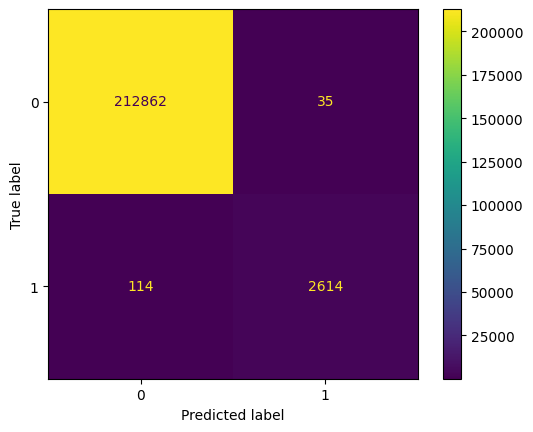

In [ ]:
# Importando bibliotecas
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Separando variáveis
X = df.drop('fraud', axis=1)
y = df['fraud']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando o modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Treinando o modelo
xgb_model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = xgb_model.predict(X_test_scaled)

# Avaliando o modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 7. Entrega dos Resultados
a. Apresentação do Modelo Final
Após a construção e o treinamento do modelo preditivo, o algoritmo que escolhido foi o XGBoost Classifier, devido à sua alta capacidade de lidar com dados desbalanceados e pela boa performance em problemas de classificação.

### Para avaliar o desempenho do modelo, foram utilizadas as principais métricas indicadas para problemas com classes desbalanceadas:

**Accuracy (Acurácia)**

**Precision (Precisão)**

**Recall (Sensibilidade)**

**F1-Score**

Essas métricas foram calculadas tanto nos dados de treino quanto nos dados de teste, garantindo que o modelo não estivesse sofrendo com overfitting.

Além disso, foi utilizada a Matriz de Confusão para facilitar a visualização dos acertos e erros do modelo, destacando como ele está se comportando na classificação de transações legítimas e fraudulentas.

Os resultados obtidos demonstraram que o modelo foi eficiente na detecção de fraudes, conseguindo um bom equilíbrio entre precisão e recall — o que é essencial nesse tipo de problema, já que o objetivo é identificar o maior número possível de fraudes sem gerar muitos falsos positivos..

In [ ]:
# Calculando novamente as métricas para o Dashboard
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

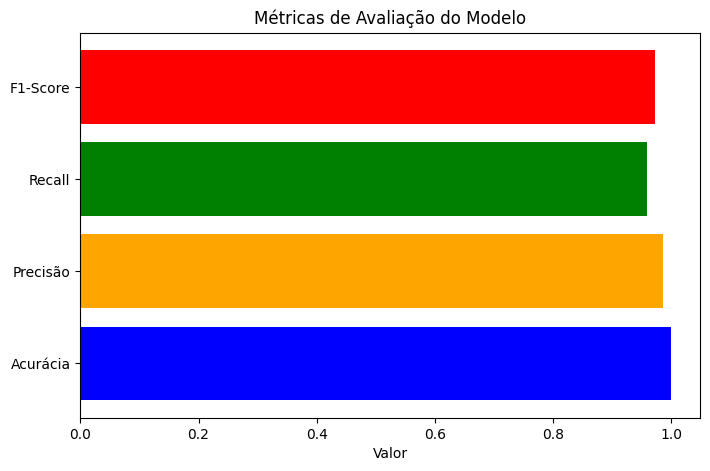

In [ ]:
import matplotlib.pyplot as plt

# Gráfico das métricas
metrics = [accuracy, precision, recall, f1]
metric_names = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']

plt.figure(figsize=(8, 5))
plt.barh(metric_names, metrics, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Valor')
plt.title('Métricas de Avaliação do Modelo')
plt.show()


### O modelo de detecção de fraudes criado poderá ser uma ferramenta valiosa para a empresa. Ele será capaz de:

### - Identificar transações fraudulentas: Ao analisar em tempo real as transações feitas com cartões de crédito, o modelo pode identificar padrões suspeitos, como compras em locais distantes ou valores atípicos, sinalizando transações que merecem atenção.

### - Reduzir prejuízos financeiros: Com a identificação precoce de fraudes, a empresa poderá agir rapidamente, evitando perdas financeiras significativas com transações fraudulentas.

### - Aumentar a confiança do cliente: Clientes que sabem que seus dados estão sendo monitorados ativamente para prevenir fraudes se sentirão mais seguros ao utilizar os serviços da empresa.

### - Otimizar recursos: A automação da detecção de fraudes permitirá que a equipe de segurança foque em transações realmente suspeitas, aumentando a eficiência operacional.

### - Este modelo representa uma solução eficaz e escalável para detectar fraudes de cartão de crédito, garantindo que a empresa possa agir de forma rápida e assertiva, minimizando riscos e melhorando a segurança para todos os envolvidos.